In [1]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter("ignore")


In [2]:
data = pd.read_csv("Language Detection.csv")

In [3]:
X = data["Text"]
y = data["Language"]

In [4]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [5]:
# creating a list for appending the preprocessed text
data_list = []
# iterating through all the text
for text in X:
       # removing the symbols and numbers
        text = re.sub(r'[!@#$(),n"%^*?:;~`0-9]', ' ', text)
        text = re.sub(r'[[]]', ' ', text)
        # converting the text to lower case
        text = text.lower()
        # appending to data_list
        data_list.append(text)

In [6]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform(data_list).toarray()
X.shape # (10337, 39419)

(10337, 34937)

In [7]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size = 0.20)

In [8]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(x_train, y_train)

MultinomialNB()

In [9]:
y_pred = model.predict(x_test)

In [10]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
ac = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("Accuracy is :",ac)

Accuracy is : 0.9787234042553191


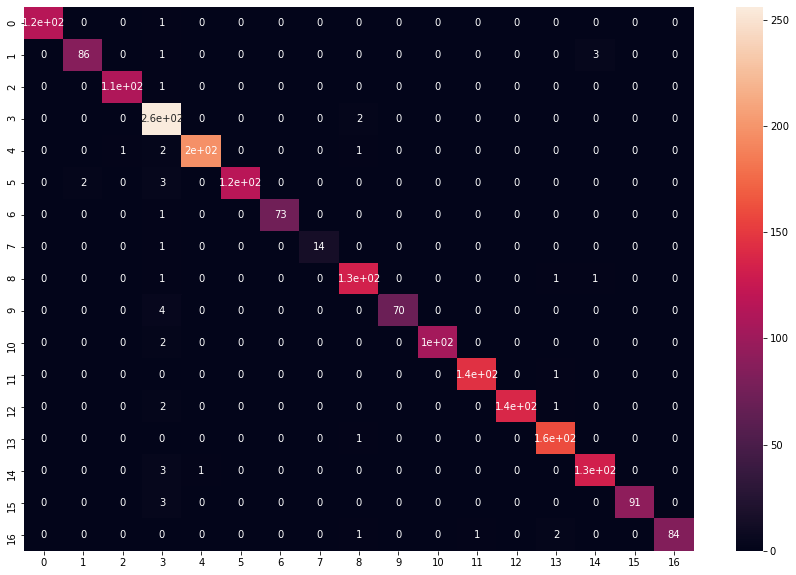

In [11]:
plt.figure(figsize=(15,10))
sns.heatmap(cm, annot = True)
plt.show()

In [12]:
def predict(text):
     x = cv.transform([text]).toarray() # converting text to bag of words model (Vector)
     lang = model.predict(x) # predicting the language
     lang = le.inverse_transform(lang) # finding the language corresponding the the predicted value
     print("The langauge is in",lang[0]) # printing the language

In [13]:
predict("Welcome to sharad mittal's blog")

The langauge is in English


In [14]:
predict("मित्तल के ब्लॉग पर आपका स्वागत है")

The langauge is in Hindi


In [15]:
predict("Καλώς ήλθατε στο blog του sharad mittal")

The langauge is in Greek
